In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.2)
import pandas as pd
import scipy.stats
import warnings
from copy import copy

warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Plotting function
#Plotting function
import sys
Scripts_Folder = '/home/sheffieldlab/Desktop/NoReward/Scripts/BayesDecoder/'
sys.path.append(Scripts_Folder)

from PlotDecodingResults import ModelPredictionPlots
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from RunBayesonNorewardData import PrepareBehaviorData as PreBeh
from RunBayesonNorewardData import PreprocessData as PreD
from RunBayesonNorewardData import RunNaiveBayes_ondata as rnb

rnb = rnb()
PreD = PreD()
m = ModelPredictionPlots()

Using TensorFlow backend.


Validation functions
Validation functions


## Prepare datasets

In [3]:
task_dict = {'Task1': '1 Fam Rew',
             'Task2': '2 No Rew',
             'Task3': '3 Fam Rew',
             'Task4': '4 Nov Rew'}

In [13]:
FolderName = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/CFC4/'
animalname = os.path.basename(os.path.normpath(FolderName))
frame_lick_stop = 5154
task_numframes = {'Task1': 15000, 
                  'Task2': 20000, 
                  'Task3': 15000, 
                  'Task4': 15000}
#Track Parameters
tracklength = 200 #2m track
trackbins = 5 #5cm bins

In [14]:
SaveResults = os.path.join(FolderName, 'DecoderResults', 'BayesDecoder')
if not os.path.exists(SaveResults):
    os.mkdir(SaveResults)

In [15]:
from Placecells_and_LickCorrelation_EachAnimal import GetData as gd
A = gd(FolderName=FolderName, Task_NumFrames=task_numframes, TaskDict=task_dict, lick_stop=frame_lick_stop, v73_flag=1)

F (1924, 65000)
Fc (1924, 65000)
Fc3 (1924, 65000)
Number of PlaceCells in Task1 is 227
Number of PlaceCells in Task4 is 345
Number of PlaceCells in Task2 is 285
Number of PlaceCells in Task3 is 314


### Load required Data - load actual running data

#### Control Data

In [16]:
X = A.Fc3data_dict['Task1'].T
Y = A.Parsed_Behavior['running_data'].item()['Task1']

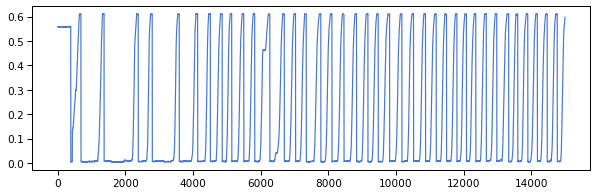

In [17]:
plt.figure(figsize = (10, 3))
plt.plot(Y)

#### No Reward Data

In [18]:
X_Norew = A.Fc3data_dict['Task2'].T
Y_Norew = A.Parsed_Behavior['running_data'].item()['Task2']

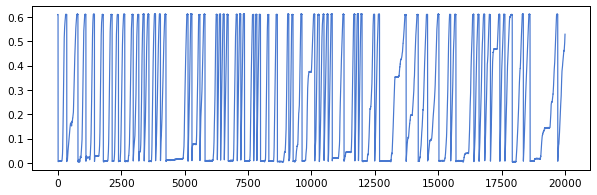

In [19]:
plt.figure(figsize = (10, 3))
plt.plot(Y_Norew)

#### No Reward with good laps

In [20]:
X_Norew_goodlaps = A.Fc3data_dict['Task2'][:, A.Parsed_Behavior['good_running_index'].item()['Task2']].T
Y_Norew_goodlaps = A.Parsed_Behavior['good_running_data'].item()['Task2']

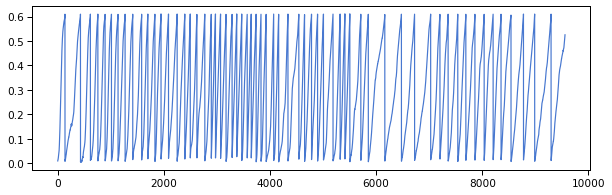

In [21]:
plt.figure(figsize = (10, 3))
plt.plot(Y_Norew_goodlaps)

#### No reward with licks

In [22]:
stoplicklap = A.Parsed_Behavior['lick_stop'].item()
laptime_lick = np.asarray(A.Parsed_Behavior['goodlaps_laptime'].item()['Task2'])[:stoplicklap] 

### Compare velocity of tasks and select laps with comparable speeds

In [24]:
#Comparing two tasks
TaskA = 'Task1'
TaskB = 'Task2'
lapvelocityA, lapvelocityB, common_v_lapsA, common_v_lapsB, worst_lapsB = PreD.get_laps_of_similar_velocity(A, TaskA='Task1', TaskB='Task2', tol=0, after_stoplick=1)
correctedlaptime_worstlaps = np.asarray(A.Parsed_Behavior['goodlaps_laptime'].item()['Task2'])[worst_lapsB]

Chosen speeds
Number of chosen laps : Task1 : 39, Task2 : 29
Remainin laps in 24
Task1 [6.71400904 4.0348612  3.90574564 3.45384119 3.45384119 3.58295675
 3.29244674 3.93802453 3.4215623  3.87346675 3.64751453 7.65009684
 7.10135571 3.93802453 3.97030342 4.6481601  4.3576501  4.09941898
 4.00258231 3.93802453 4.00258231 4.55132343 4.19625565 4.0348612
 3.67979342 4.22853454 3.64751453 3.74435119 3.80890897 3.97030342
 3.64751453 3.84118786 4.42220788 3.51839897 3.87346675 4.13169787
 4.26081343 3.84118786 3.67979342]
Task2 [4.19625565 5.32601679 5.06778567 4.3576501  3.45384119 4.51904454
 5.32601679 4.38992899 3.32472563 4.84183344 3.61523564 3.35700452
 4.58360232 6.03615236 3.55067786 3.93802453 3.64751453 5.35829567
 7.55326017 4.45448677 5.32601679 4.90639122 4.58360232 5.39057456
 5.51969012 4.71271788 6.90768238 7.39186572 6.71400904]
Worst lap speeds Task2
[ 8.55390575  9.84506133 10.68431246 17.23692705 13.39573919  7.87604906
 11.94318915 10.61975468 10.23240801 20.07746934]


In [25]:
# These laps dont have correct imaging data
common_v_lapsA_corrected = np.array([i for i in common_v_lapsA if i not in [0, 1]])

Data shapes :  (7064, 1924) (7064, 1)
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[35  4 26  3 20 15 11 17 24  7 36 22 29 19 13  2 14 23 18 38  8 33 28 12
 32 31 10 34 16]
New data shapes :  (5119, 1924) (5119, 1)


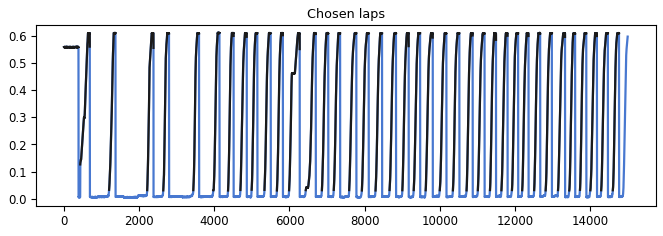

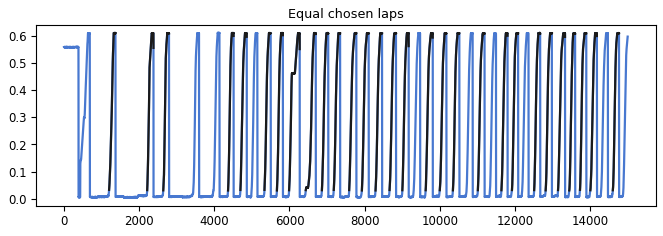

In [26]:
#Control Data
X_v_new, Y_v_new = PreD.compile_data_from_thresholdedlaps(A, Task=TaskA, X_data=X, Y_data=Y, thresholded_laps=common_v_lapsA, E_correction=1, figureflag=1)
X_v_eq, Y_v_eq = PreD.equalise_laps_with_numlaps_innorew(A, X, Y, Tasklabel='Task1', laps_current=common_v_lapsA_corrected, 
                                         numlaps_topick=np.size(common_v_lapsB), E_correction=1)

Data shapes :  (5761, 1924) (5761, 1)


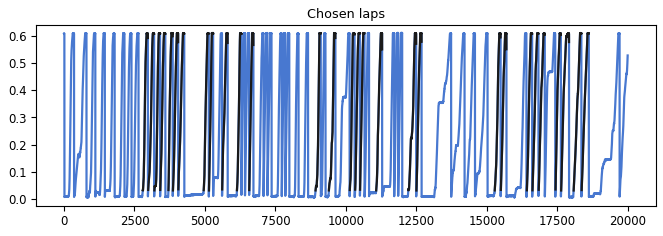

In [37]:
# Reward data with fast laps
X_v_new_norew, Y_v_new_norew = PreD.compile_data_from_thresholdedlaps(A, Task=TaskB, X_data=X_Norew, Y_data=Y_Norew, thresholded_laps=common_v_lapsB, E_correction=2, figureflag=1)

Data shapes :  (2149, 1924) (2149, 1)


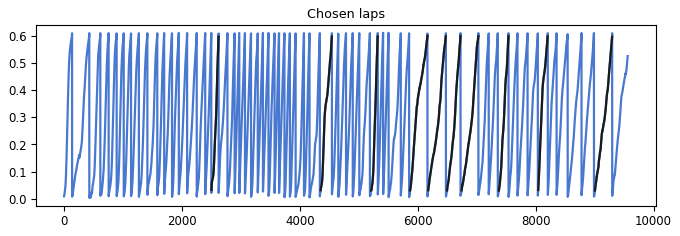

In [28]:
#Reward data with corrected laps
X_new_norew_goodlaps, Y_new_norew_goodlaps = PreD.compile_data_from_thresholdedlaps(A, Task=TaskB, X_data=X_Norew_goodlaps, Y_data=Y_Norew_goodlaps, 
                                              thresholded_laps=worst_lapsB, E_correction=1, 
                                              lapcorrectionflag=1, figureflag=1)

Data shapes :  (1094, 1924) (1094, 1)


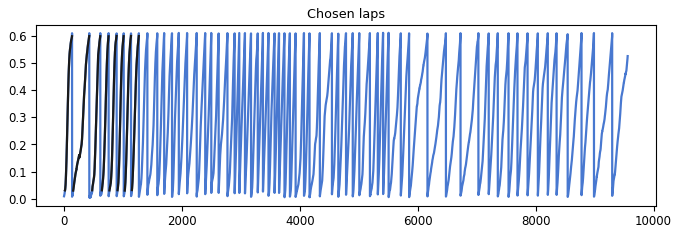

In [29]:
X_v_new_lick, Y_v_new_lick = PreD.compile_data_from_thresholdedlaps(A, Task=TaskB, X_data=X_Norew_goodlaps, Y_data=Y_Norew_goodlaps, thresholded_laps=np.arange(stoplicklap), E_correction=1, lapcorrectionflag=1, figureflag=1)

### Shuffle Data and do k-fold validation

In [38]:
nsplits = 5
niteration = 100

#In order of tasks = 'Control', 'NoReward_Fastlaps', 'NoReward_Slowlaps', 'NoReward_Lick'
figure_flag = 0 #For behavior
E_correction = [1, 2, 1, 1]

In [39]:
mean_R2 = {k: np.zeros(niteration)
           for k in ['Control', 'NoReward_Fastlaps', 'NoReward_Slowlaps', 'NoReward_Lick']}
for i in np.arange(niteration):
    # Shuffle laps and pick up random laps each time to compile
    # Control
    X_v_eq, Y_v_eq = PreD.equalise_laps_with_numlaps_innorew(A, X, Y, Tasklabel='Task1', laps_current=common_v_lapsA_corrected,
                                                             numlaps_topick=np.size(common_v_lapsB), 
                                                             E_correction=E_correction[0], figureflag=0)
    B = PreBeh(BehaviorData=Y_v_eq,
               tracklength=tracklength, trackbins=trackbins, figure_flag=figure_flag)
    y_v_eq_cat = B.position_binary

    # No Reward good laps
    X_v_new_norew, Y_v_new_norew = PreD.compile_data_from_thresholdedlaps(
        A, Task=TaskB, X_data=X_Norew, Y_data=Y_Norew, thresholded_laps=common_v_lapsB,
        E_correction=E_correction[1], randomise=1, figureflag=0)
    B = PreBeh(BehaviorData=Y_v_new_norew, tracklength=tracklength,
               trackbins=trackbins, figure_flag=figure_flag)
    y_v_cat_norew = B.position_binary

    # No Reward worst laps
    X_norew_goodlaps_eq, Y_norew_goodlaps_eq = PreD.equalise_laps_with_numlaps_innorew(A, X_Norew_goodlaps, Y_Norew_goodlaps, Tasklabel='Task2', laps_current=worst_lapsB,
                                                                                       numlaps_topick=np.size(common_v_lapsB), 
                                                                                       E_correction=E_correction[2], lapcorrectionflag=1, figureflag=0)
    B = PreBeh(BehaviorData=Y_norew_goodlaps_eq, tracklength=tracklength,
               trackbins=trackbins, trackstart_index=0, figure_flag=figure_flag)
    y_norew_goodlaps_eq_cat = B.position_binary

    # No Reward before lick stops
    X_v_new_lick, Y_v_new_lick = PreD.compile_data_from_thresholdedlaps(
        A, Task=TaskB, X_data=X_Norew_goodlaps, Y_data=Y_Norew_goodlaps, thresholded_laps=np.arange(
            stoplicklap), randomise=1, E_correction=E_correction[3], lapcorrectionflag=1, figureflag=0)

    B = PreBeh(BehaviorData=Y_v_new_lick, tracklength=tracklength,
               trackbins=trackbins, trackstart_index=0, figure_flag=figure_flag)
    y_v_new_lick_cat = B.position_binary

    # K-Fold validation
    controlcv_dataframe = rnb.k_foldvalidation(
        X_data=X_v_eq, y_cat_data=y_v_eq_cat, split_size=nsplits, figureflag=0)
    mean_R2['Control'][i] = np.mean(controlcv_dataframe['R2'])

    norewardcv_dataframe = rnb.k_foldvalidation(
        X_data=X_v_new_norew, y_cat_data=y_v_cat_norew, split_size=nsplits, figureflag=0)
    mean_R2['NoReward_Fastlaps'][i] = np.mean(norewardcv_dataframe['R2'])

    norewardcv_goodlaps_dataframe = rnb.k_foldvalidation(
        X_data=X_norew_goodlaps_eq, y_cat_data=y_norew_goodlaps_eq_cat, split_size=nsplits, figureflag=0)
    mean_R2['NoReward_Slowlaps'][i] = np.mean(norewardcv_goodlaps_dataframe['R2'])
    
    lickcv_dataframe = rnb.k_foldvalidation(
        X_data=X_v_new_lick, y_cat_data=y_v_new_lick_cat, split_size=nsplits, figureflag=0)
    mean_R2['NoReward_Lick'][i] = np.mean(lickcv_dataframe['R2'])

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[21 30 26  5 37  3 19 11 28  2 31 17 13 10 33 14  4 15 27 35 38 16 34 12
 18  8 29 32 25]
New data shapes :  (5085, 1924) (5085, 1)
Data shapes :  (5761, 1924) (5761, 1)
[48 45 40 55 60 34 17 46 47 51]
[48 45 40 55 60 34 17 46 47 51]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(4068, 1924) (4068,) (1017, 1924) (1017,)

Accuracy of test set:: 0.40%
Validation 2
(4068, 1924) (4068,) (1017, 1924) (1017,)

Accuracy of test set:: 0.36%
Validation 3
(4068, 1924) (4068,) (1017, 1924) (1017,)

Accuracy of test set:: 0.37%
Validation 4
(4068, 1924) (4068,) (1017, 1924) (1017,)

Accuracy of test set:: 0.45%
Validation 5
(4068, 1924) (4068,) (1017, 1924) (1017,)

Accuracy of test set:: 0.45%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.21%
Vali

Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.04%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.10%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.19%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.18%
Validation 3
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.11%
Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.18%
Validation 5
(876, 1924) (876,) (218, 1924) (218,)

Accuracy of test set:: 0.10%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[32 35 36 26 33 27 19 38  4 14 21 20 11 29 12 16 10  6 23  5 18  8  9 30
  3 31 13 24 37]
New data shapes :  (5086, 1924) (5086, 1)
Data shapes :  (5761, 1924) (5761, 1)
[55 46 40 17 48 47 34 45 51 60]
[55 46 40 17 48 47 34 45 51 60]
New data shapes :  (2149, 1924) (2149, 1)
Data shape


Accuracy of test set:: 0.21%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.21%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.24%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.25%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.23%
Performing 5-fold validation
Validation 1
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.06%
Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.08%
Validation 3
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.13%
Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.10%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.06%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.13%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0

Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(4069, 1924) (4069,) (1018, 1924) (1018,)

Accuracy of test set:: 0.40%
Validation 2
(4069, 1924) (4069,) (1018, 1924) (1018,)

Accuracy of test set:: 0.44%
Validation 3
(4070, 1924) (4070,) (1017, 1924) (1017,)

Accuracy of test set:: 0.47%
Validation 4
(4070, 1924) (4070,) (1017, 1924) (1017,)

Accuracy of test set:: 0.39%
Validation 5
(4070, 1924) (4070,) (1017, 1924) (1017,)

Accuracy of test set:: 0.47%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.21%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.19%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.24%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.21%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.28%
Performing 5-fold validation
Validation 1
(1719, 1924)

Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.05%
Validation 5
(876, 1924) (876,) (218, 1924) (218,)

Accuracy of test set:: 0.17%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[ 7 18 34 29  8 23 15 13 38 14  9 12  4 25 10 32 22 35 24  5 20 19  2 33
 11 21 28  3 27]
New data shapes :  (5031, 1924) (5031, 1)
Data shapes :  (5761, 1924) (5761, 1)
[47 60 45 34 46 51 40 17 55 48]
[47 60 45 34 46 51 40 17 55 48]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(4024, 1924) (4024,) (1007, 1924) (1007,)

Accuracy of test set:: 0.39%
Validation 2
(4025, 1924) (4025,) (1006, 1924) (1006,)

Accuracy of test set:: 0.42%
Validation 3
(4025, 1924) (4025,) (1006, 1924) (1006,)

Accuracy of test set:: 0.41%
Validation 4
(4025, 1924) (4025,) (1006, 1924) (1006,)

Accuracy of test set:: 0.42%
Validation 5
(4025, 1924) (4025,) (1006, 

Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.10%
Validation 3
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.07%
Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.07%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.07%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.14%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.17%
Validation 3
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.18%
Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.15%
Validation 5
(876, 1924) (876,) (218, 1924) (218,)

Accuracy of test set:: 0.10%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[14 36 22  9 29 18 20 24 28 26 10 25  4  3  8 11 16 37 32 13 23 19 35 27
 21 30  5 38 15]
New data shapes :  (4979, 1924


Accuracy of test set:: 0.41%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.26%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.20%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.20%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.25%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.20%
Performing 5-fold validation
Validation 1
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.09%
Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.06%
Validation 3
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.09%
Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.11%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.07%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924)

New data shapes :  (5101, 1924) (5101, 1)
Data shapes :  (5761, 1924) (5761, 1)
[51 55 17 45 46 40 60 47 34 48]
[51 55 17 45 46 40 60 47 34 48]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(4080, 1924) (4080,) (1021, 1924) (1021,)

Accuracy of test set:: 0.34%
Validation 2
(4081, 1924) (4081,) (1020, 1924) (1020,)

Accuracy of test set:: 0.38%
Validation 3
(4081, 1924) (4081,) (1020, 1924) (1020,)

Accuracy of test set:: 0.38%
Validation 4
(4081, 1924) (4081,) (1020, 1924) (1020,)

Accuracy of test set:: 0.42%
Validation 5
(4081, 1924) (4081,) (1020, 1924) (1020,)

Accuracy of test set:: 0.40%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.22%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.20%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.20%
Validation 4
(4609, 1924) (4609,) (115

Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.17%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.16%
Validation 3
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.12%
Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.22%
Validation 5
(876, 1924) (876,) (218, 1924) (218,)

Accuracy of test set:: 0.18%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[ 7 31 13 36  5 14 18 22 28 30 32 27 15  8 38  6 19 29 17 20 24  2 33 37
 26 10 23 12 16]
New data shapes :  (5138, 1924) (5138, 1)
Data shapes :  (5761, 1924) (5761, 1)
[47 46 48 17 45 60 55 40 51 34]
[47 46 48 17 45 60 55 40 51 34]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(4110, 1924) (4110,) (1028, 1924) (1028,)

Accuracy of test set:: 0.36%
Validation 2
(4110, 1924


Accuracy of test set:: 0.23%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.22%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.27%
Performing 5-fold validation
Validation 1
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.11%
Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.06%
Validation 3
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.04%
Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.13%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.11%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.11%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.20%
Validation 3
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.17%
Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.11%
Val


Accuracy of test set:: 0.34%
Validation 2
(3997, 1924) (3997,) (1000, 1924) (1000,)

Accuracy of test set:: 0.41%
Validation 3
(3998, 1924) (3998,) (999, 1924) (999,)

Accuracy of test set:: 0.41%
Validation 4
(3998, 1924) (3998,) (999, 1924) (999,)

Accuracy of test set:: 0.40%
Validation 5
(3998, 1924) (3998,) (999, 1924) (999,)

Accuracy of test set:: 0.41%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.24%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.18%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.24%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.25%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.26%
Performing 5-fold validation
Validation 1
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.11%
Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test


Accuracy of test set:: 0.24%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[11 18  4 34 35 30 27 20  7 37 28 33  9 15 21  2 13 36 38 25  8  6 23 32
 31 29 16 22 26]
New data shapes :  (4962, 1924) (4962, 1)
Data shapes :  (5761, 1924) (5761, 1)
[47 60 34 17 46 55 45 48 40 51]
[47 60 34 17 46 55 45 48 40 51]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(3969, 1924) (3969,) (993, 1924) (993,)

Accuracy of test set:: 0.42%
Validation 2
(3969, 1924) (3969,) (993, 1924) (993,)

Accuracy of test set:: 0.40%
Validation 3
(3970, 1924) (3970,) (992, 1924) (992,)

Accuracy of test set:: 0.35%
Validation 4
(3970, 1924) (3970,) (992, 1924) (992,)

Accuracy of test set:: 0.46%
Validation 5
(3970, 1924) (3970,) (992, 1924) (992,)

Accuracy of test set:: 0.46%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of t

Validation 3
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.10%
Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.08%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.08%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.22%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.16%
Validation 3
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.12%
Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.22%
Validation 5
(876, 1924) (876,) (218, 1924) (218,)

Accuracy of test set:: 0.18%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[ 3 18 20 22 35  8  5 30 33 32 28  9 10 34 25 27 23 13 29 24 15  6 17 31
 16 19  7 21 12]
New data shapes :  (5077, 1924) (5077, 1)
Data shapes :  (5761, 1924) (5761, 1)
[55 48 17 60 51 45 34 46 40 47]
[

Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.26%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.21%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.20%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.23%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.20%
Performing 5-fold validation
Validation 1
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.08%
Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.10%
Validation 3
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.11%
Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.15%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.09%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:

Data shapes :  (5761, 1924) (5761, 1)
[47 34 55 48 45 46 40 60 51 17]
[47 34 55 48 45 46 40 60 51 17]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(4037, 1924) (4037,) (1010, 1924) (1010,)

Accuracy of test set:: 0.44%
Validation 2
(4037, 1924) (4037,) (1010, 1924) (1010,)

Accuracy of test set:: 0.42%
Validation 3
(4038, 1924) (4038,) (1009, 1924) (1009,)

Accuracy of test set:: 0.34%
Validation 4
(4038, 1924) (4038,) (1009, 1924) (1009,)

Accuracy of test set:: 0.39%
Validation 5
(4038, 1924) (4038,) (1009, 1924) (1009,)

Accuracy of test set:: 0.41%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.25%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.22%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.22%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0


Accuracy of test set:: 0.18%
Validation 3
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.16%
Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.11%
Validation 5
(876, 1924) (876,) (218, 1924) (218,)

Accuracy of test set:: 0.17%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[11 16  3  7 19 10 28  5 21 27 14 13 37  9 20 35 18 24 12 26 32  8 17 25
 38 15 29  4 34]
New data shapes :  (5039, 1924) (5039, 1)
Data shapes :  (5761, 1924) (5761, 1)
[55 60 46 45 51 47 17 48 40 34]
[55 60 46 45 51 47 17 48 40 34]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(4031, 1924) (4031,) (1008, 1924) (1008,)

Accuracy of test set:: 0.41%
Validation 2
(4031, 1924) (4031,) (1008, 1924) (1008,)

Accuracy of test set:: 0.34%
Validation 3
(4031, 1924) (4031,) (1008, 1924) (1008,)

Accuracy of test set:: 0.39%
Validation 4
(4

Performing 5-fold validation
Validation 1
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.10%
Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.07%
Validation 3
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.13%
Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.09%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.10%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.18%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.15%
Validation 3
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.24%
Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.18%
Validation 5
(876, 1924) (876,) (218, 1924) (218,)

Accuracy of test set:: 0.22%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[21 25  


Accuracy of test set:: 0.31%
Validation 4
(4058, 1924) (4058,) (1014, 1924) (1014,)

Accuracy of test set:: 0.39%
Validation 5
(4058, 1924) (4058,) (1014, 1924) (1014,)

Accuracy of test set:: 0.46%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.20%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.21%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.17%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.17%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.23%
Performing 5-fold validation
Validation 1
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.12%
Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.14%
Validation 3
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.19%
Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of te

New data shapes :  (5103, 1924) (5103, 1)
Data shapes :  (5761, 1924) (5761, 1)
[48 40 17 55 45 60 47 46 34 51]
[48 40 17 55 45 60 47 46 34 51]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(4082, 1924) (4082,) (1021, 1924) (1021,)

Accuracy of test set:: 0.44%
Validation 2
(4082, 1924) (4082,) (1021, 1924) (1021,)

Accuracy of test set:: 0.33%
Validation 3
(4082, 1924) (4082,) (1021, 1924) (1021,)

Accuracy of test set:: 0.42%
Validation 4
(4083, 1924) (4083,) (1020, 1924) (1020,)

Accuracy of test set:: 0.37%
Validation 5
(4083, 1924) (4083,) (1020, 1924) (1020,)

Accuracy of test set:: 0.44%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.27%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.17%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.29%
Validation 4
(4609, 1924) (4609,) (115

Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.16%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.13%
Validation 3
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.16%
Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.13%
Validation 5
(876, 1924) (876,) (218, 1924) (218,)

Accuracy of test set:: 0.17%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[ 6 22 12 25  7 17  8 36 30 28 20 14 38 37 11 24 33 13 21 32 19 35 27 23
  4 18 29  2 34]
New data shapes :  (5088, 1924) (5088, 1)
Data shapes :  (5761, 1924) (5761, 1)
[60 46 17 47 51 48 40 45 55 34]
[60 46 17 47 51 48 40 45 55 34]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(4070, 1924) (4070,) (1018, 1924) (1018,)

Accuracy of test set:: 0.32%
Validation 2
(4070, 1924

Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.22%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.25%
Performing 5-fold validation
Validation 1
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.10%
Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.10%
Validation 3
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.10%
Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.11%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.05%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.17%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.05%
Validation 3
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.11%
Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.19%
Validation 5
(876, 1924) (876,) (

Validation 2
(4048, 1924) (4048,) (1012, 1924) (1012,)

Accuracy of test set:: 0.35%
Validation 3
(4048, 1924) (4048,) (1012, 1924) (1012,)

Accuracy of test set:: 0.42%
Validation 4
(4048, 1924) (4048,) (1012, 1924) (1012,)

Accuracy of test set:: 0.42%
Validation 5
(4048, 1924) (4048,) (1012, 1924) (1012,)

Accuracy of test set:: 0.38%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.11%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.26%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.16%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.21%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.27%
Performing 5-fold validation
Validation 1
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.05%
Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.07%
Validation 


Accuracy of test set:: 0.19%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[26 28  7 19 15 32 14 30 11  3  5 33 18 13 38 31  8  4 10 21 24 16  2 35
 23 27 17 20 22]
New data shapes :  (4994, 1924) (4994, 1)
Data shapes :  (5761, 1924) (5761, 1)
[17 45 48 34 55 46 60 51 40 47]
[17 45 48 34 55 46 60 51 40 47]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(3995, 1924) (3995,) (999, 1924) (999,)

Accuracy of test set:: 0.43%
Validation 2
(3995, 1924) (3995,) (999, 1924) (999,)

Accuracy of test set:: 0.47%
Validation 3
(3995, 1924) (3995,) (999, 1924) (999,)

Accuracy of test set:: 0.38%
Validation 4
(3995, 1924) (3995,) (999, 1924) (999,)

Accuracy of test set:: 0.40%
Validation 5
(3996, 1924) (3996,) (998, 1924) (998,)

Accuracy of test set:: 0.46%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of t

Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.08%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.10%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.21%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.16%
Validation 3
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.11%
Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.18%
Validation 5
(876, 1924) (876,) (218, 1924) (218,)

Accuracy of test set:: 0.10%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[30 16  7  3 14 29  9 26 25  2 27 33 38 31 20 37  8  4 22 17 28 35  6 36
 18 12 15 32 10]
New data shapes :  (5002, 1924) (5002, 1)
Data shapes :  (5761, 1924) (5761, 1)
[17 34 51 46 48 60 40 55 45 47]
[17 34 51 46 48 60 40 55 45 47]
New data shapes :  (2149, 1924) (2149, 1)
Data shape


Accuracy of test set:: 0.23%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.18%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.18%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.20%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.23%
Performing 5-fold validation
Validation 1
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.16%
Validation 2
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.07%
Validation 3
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.08%
Validation 4
(1719, 1924) (1719,) (430, 1924) (430,)

Accuracy of test set:: 0.06%
Validation 5
(1720, 1924) (1720,) (429, 1924) (429,)

Accuracy of test set:: 0.10%
Performing 5-fold validation
Validation 1
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.19%
Validation 2
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0

Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(4066, 1924) (4066,) (1017, 1924) (1017,)

Accuracy of test set:: 0.38%
Validation 2
(4066, 1924) (4066,) (1017, 1924) (1017,)

Accuracy of test set:: 0.30%
Validation 3
(4066, 1924) (4066,) (1017, 1924) (1017,)

Accuracy of test set:: 0.45%
Validation 4
(4067, 1924) (4067,) (1016, 1924) (1016,)

Accuracy of test set:: 0.43%
Validation 5
(4067, 1924) (4067,) (1016, 1924) (1016,)

Accuracy of test set:: 0.44%
Performing 5-fold validation
Validation 1
(4608, 1924) (4608,) (1153, 1924) (1153,)

Accuracy of test set:: 0.23%
Validation 2
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.22%
Validation 3
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.27%
Validation 4
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.18%
Validation 5
(4609, 1924) (4609,) (1152, 1924) (1152,)

Accuracy of test set:: 0.19%
Performing 5-fold validation
Validation 1
(1719, 1924)

Validation 4
(875, 1924) (875,) (219, 1924) (219,)

Accuracy of test set:: 0.22%
Validation 5
(876, 1924) (876,) (218, 1924) (218,)

Accuracy of test set:: 0.24%
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
[ 8 26 31 24  5  3 12 30 21 20 22 29 15 38 17 27  9  4 23 11 37  2 25 28
 36 34 33  7 14]
New data shapes :  (4964, 1924) (4964, 1)
Data shapes :  (5761, 1924) (5761, 1)
[48 47 45 46 51 40 34 17 55 60]
[48 47 45 46 51 40 34 17 55 60]
New data shapes :  (2149, 1924) (2149, 1)
Data shapes :  (1094, 1924) (1094, 1)
Performing 5-fold validation
Validation 1
(3971, 1924) (3971,) (993, 1924) (993,)

Accuracy of test set:: 0.41%
Validation 2
(3971, 1924) (3971,) (993, 1924) (993,)

Accuracy of test set:: 0.38%
Validation 3
(3971, 1924) (3971,) (993, 1924) (993,)

Accuracy of test set:: 0.41%
Validation 4
(3971, 1924) (3971,) (993, 1924) (993,)

Accuracy of test set:: 0.41%
Validation 5
(3972, 1924) (3972,) (992, 1924) (99

In [40]:
R2 = pd.DataFrame.from_dict(mean_R2)
R2 = R2.melt(var_name='TaskName', value_name='R2')

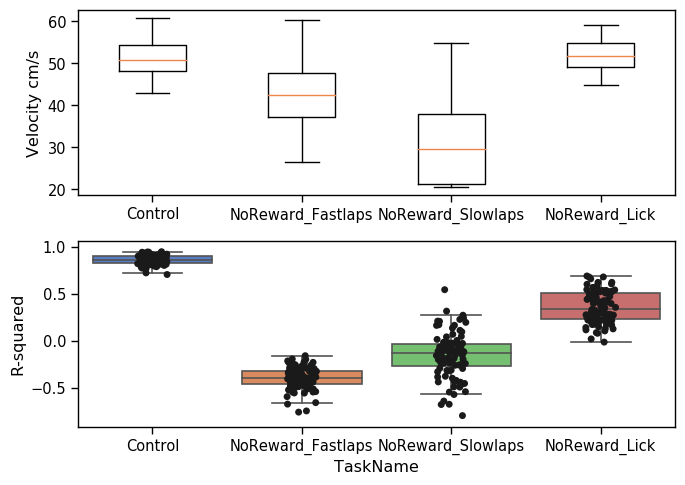

In [41]:
fs, ax1 = plt.subplots(2, 1, figsize=(7, 5), dpi=100)

# plot velocity distributions to show equality
ax1[0].boxplot([tracklength/lapvelocityA, tracklength/lapvelocityB,
                tracklength/correctedlaptime_worstlaps, tracklength/laptime_lick], showfliers=False)
ax1[0].set_xticklabels(['Control', 'NoReward_Fastlaps', 'NoReward_Slowlaps', 'NoReward_Lick'])
ax1[0].set_ylabel('Velocity cm/s')

sns.boxplot(x='TaskName', y='R2', data=R2, ax=ax1[1], showfliers=False)
sns.stripplot(x='TaskName', y='R2', data=R2, jitter=True, color='k', ax=ax1[1])
ax1[1].set_ylabel('R-squared');
fs.tight_layout()

### Save results

In [30]:
#Save R-squared dataframe
R2.to_pickle(os.path.join(SaveResults, 'velocity_comparison_shuffle_R2.pkl'))